In [48]:
from scipy.io import netcdf
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.style

import matplotlib

matplotlib.style.use('classic')

In [49]:
import pandas as pd
import glob

path = r'C:/Users/yashg/OneDrive/Desktop/CMU/Project/December/Matthews_Radar_files' # use your path
all_files = glob.glob(path + "/*.cdf")
data_will='C:/Users/yashg/OneDrive/Desktop/CMU/Project/December/sgp1sbd449precipDSDC1.c1.20110520.060000.nc'

In [50]:
def bins(files,will,nt,nz=5,zlim=5,zup=4,tlow=6,tup=10,vlow=-20,vup=20):
    #Spatial Clustering
    
    zmatt2=np.linspace(0,zup,nz)
    d=Dataset(files[0],'r')
    z_matt=np.ma.filled(d.variables['z'][:])
    arg_zm=np.argwhere(z_matt<zlim)
    w=Dataset(will,'r')
    z_will=(np.ma.filled(w.variables['sbd449_range'][:]))/1000
    arg_zw=[]
    for k in range(len(zmatt2)-1):
        m=[]
        for i in range(len(z_will)):
            if z_will[i]>zmatt2[k] and z_will[i]<zmatt2[k+1]:
                m.append(i)
        arg_zw.append(m)   
    
    #Temporal clustering
    
    t_matt=[]
    for filename in files:
        data=Dataset(filename,'r')
        hr=float(data.Time[0:2])
        m=float(data.Time[2:4])
        t=hr+m/60
        t_matt.append(t)
    h_w=np.ma.filled(w.variables['sbd449_time_hour'][:])
    m_w=np.ma.filled(w.variables['sbd449_time_minute'][:])
    v_w=np.ma.filled(w.variables['sbd449_gamma_omega'][:])
    t_will=h_w+m_w/60
    t_r=np.linspace(tlow,tup,nt)
    arg_tm=[]
    for i in range(len(t_r)-1):
        l=[]
        for j in range(len(t_matt)):
            if t_matt[j]>t_r[i] and t_matt[j]<t_r[i+1]:
                l.append(j)
        arg_tm.append(l)    
    arg_tw=[]
    for i in range(len(t_r)-1):
        l=[]
        for j in range(len(t_will)):
            if t_will[j]>t_r[i] and t_will[j]<t_r[i+1]:
                l.append(j)
        arg_tw.append(l)
        
    #Grouping velocities
    
    vwm=[]
    tw=[]
    zw=[]
    for i in range(len(arg_tw)):
        a=arg_tw[i]
        for j in range(len(arg_zw)):
            pp=[]
            tw.append(i)
            zw.append(j)
            b=arg_zw[j]
            for p in a:
                for q in b:
                    mm=v_w[int(p),int(q)]
                    pp.append(mm)
            vwm.append(pp)    
    vwa=[]
    for val in vwm:
        l=np.array([])
        for j in val:
            if (j>vlow) and(j<vup):
                l=np.append(l,j)
        f=np.average(l)
        vwa.append(f)
    vma=[]
    for c in arg_tm:
        for j in arg_zm:
            ll=np.array([])
            for m in c:
                d=Dataset(all_files[int(m)])
                vv=np.ma.filled(d.variables['Wvar'])
                if (vv[int(j),60,60]>vlow) and (vv[int(j),60,60]<vup):
                    ll=np.append(ll,vv[int(j),60,60])
            f=np.average(ll)
            vma.append(f)
            
    #Intervals
    
    s=np.array([])
    for i in range(len(t_r)-1):
        temp=(t_r[i+1]+t_r[i])/2
        s=np.append(s,temp)
    s2=np.array([])
    for i in range(len(zmatt2)-1):
        temp=(zmatt2[i+1]+zmatt2[i])/2
        s2=np.append(s2,temp)
    zp=s2
    tp=s
    t,z=np.meshgrid(tp,zp)
    r=np.array(vwa)-np.array(vma)   
    r2=r.reshape(t.shape[0],t.shape[1])
    
    #Final Plots
    
    
    plt.pcolormesh(t,z,r.reshape(t.shape[0],t.shape[1]))
    plt.xlim(tlow,tup)
    plt.ylim(0,zup)
    plt.colorbar()
    for i in zp:
        plt.axvline(i,ls='--',c='k')
    for j in tp:
        plt.axhline(j,ls='--',c='k')
    print('Vertical velocity difference between Matthews and Williams')
    plt.xlabel('Time (hrs)')
    plt.ylabel('Altitude (km)')  
    plt.title('Contour of Vertical Velocity Difference')
    plt.show()
    return r2    

## 1 hour interval

Vertical velocity difference between Matthews and Williams


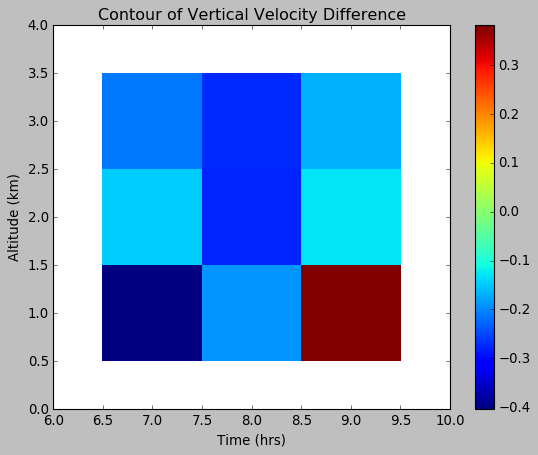

array([[-0.40367507, -0.19141892,  0.38235053,  1.5533879 ],
       [-0.14830278, -0.2757223 , -0.12773854,  0.74020906],
       [-0.2108367 , -0.27354988, -0.16795979,  1.89325248],
       [ 0.38794472,  0.96056549,  1.01798561,  1.97477143]])

In [51]:
bins(all_files,data_will,5)

## 30 minute interval

Vertical velocity difference between Matthews and Williams


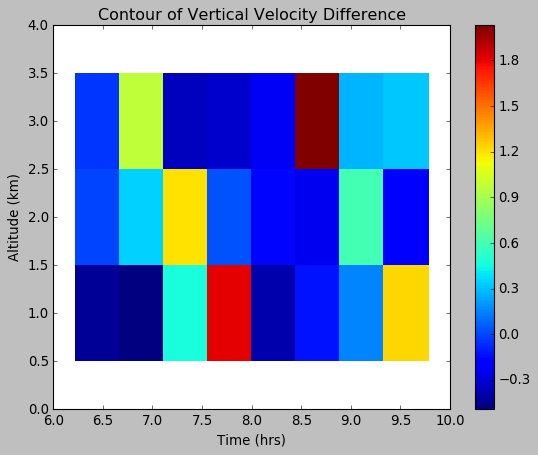

array([[-0.43510549, -0.4912947 ,  0.46688049,  1.81086919, -0.38531138,
        -0.13384879,  0.15402571,  1.2306515 , -0.28340855],
       [-0.00662885,  0.33906052,  1.20230802,  0.0221191 , -0.1646238 ,
        -0.23820647,  0.59736952, -0.18009088, -0.26342558],
       [-0.04441789,  0.9697285 , -0.35004013, -0.32307336, -0.23161418,
         2.033326  ,  0.27344837,  0.31954409,  0.40098349],
       [ 2.54889964, -0.09917656,  0.02052863,  0.27645965,  2.2277694 ,
         0.70914914,  2.00190468,  1.64982338,  1.41715214]])

In [52]:
bins(all_files,data_will,10)

## 12 minute interval

Vertical velocity difference between Matthews and Williams


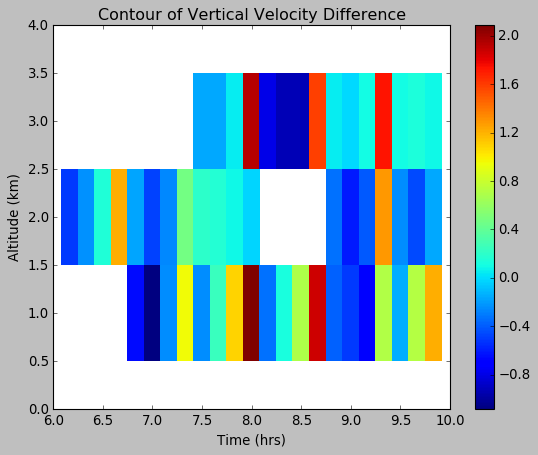

array([[        nan,         nan,         nan,         nan, -0.66254594,
        -1.08419786, -0.24454957,  0.94997606, -0.24268123,  0.25130948,
         1.08559868,  2.08989768, -0.33758431,  0.12929767,  0.69771533,
         1.87303011, -0.38833382, -0.50437825, -0.72892139,  0.70317559,
        -0.14356965,  0.71770596,  1.2152643 ,  1.87496607],
       [-0.50956638, -0.23337951,  0.15353473,  1.2162728 , -0.17190927,
        -0.48652707, -0.2651862 ,  0.47363633,  0.19922643,  0.15647883,
         0.083249  , -0.02242877,         nan,         nan,         nan,
                nan, -0.32982161, -0.60817517, -0.41251151,  1.28456907,
        -0.24282461, -0.46263518, -0.15542676,  0.77674269],
       [        nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan, -0.16636342, -0.15902224,
         0.05420859,  1.93369625, -0.78917194, -0.93480188, -0.93149012,
         1.59290473,  0.0506059 , -0.01181286,  0.09405397,  1.73524045,
  

In [54]:
bins(all_files,data_will,25)

Vertical velocity difference between Matthews and Williams


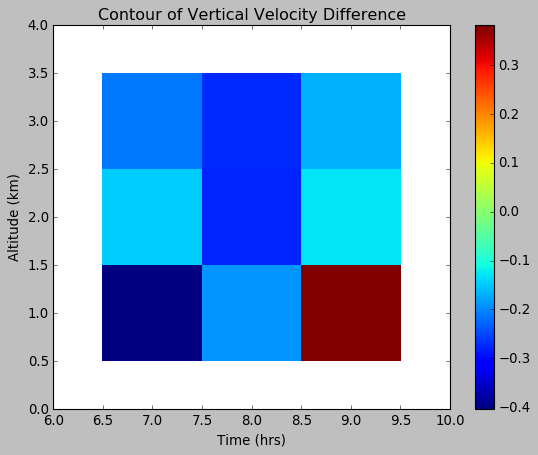

array([[-0.40367507, -0.19141892,  0.38235053,  1.5533879 ],
       [-0.14830278, -0.2757223 , -0.12773854,  0.74020906],
       [-0.2108367 , -0.27354988, -0.16795979,  1.89325248],
       [ 0.38794472,  0.96056549,  1.01798561,  1.97477143]])

In [60]:
bins(all_files,data_will,5)